## Importing Libraries

In [328]:
import matplotlib.pyplot as plt        # visualization
import numpy as np                     # matrices and high-level math functions
import pandas as pd                    # data manipulation
import seaborn as sns                  # visualization (based on matplotlib)
from scipy import stats                # statistic package 

# Changing categorical variables
from sklearn.preprocessing import LabelEncoder

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Accuracy calculations:
from sklearn import metrics        

# Dealing with imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# Decision Tree diagrams
from sklearn import tree
import graphviz

# Saving DataFrame to png:
import dataframe_image as dfi

## Data Extraction

Data extracted from CSV files *(employee_survey_data.csv, general_data.csv, manager_survey_data.csv)*

In [331]:
employee_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/employee_survey_data.csv')
general_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/general_data.csv')
manager_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/manager_survey_data.csv')


Merge all three dataframes on employee id (same number of rows, assuming same employee numbers)

In [332]:
combined_df = general_df.merge(employee_df, on='EmployeeID')
combined_df = combined_df.merge(manager_df, on='EmployeeID')
combined_df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3


In [333]:
# Looking at size of dataframe
print("df.shape =", combined_df.shape)
print("Number of rows =", combined_df.shape[0])
print("Number of columns =", combined_df.shape[1])

df.shape = (4410, 29)
Number of rows = 4410
Number of columns = 29


## DataFrame Cleanup

In [334]:
# Summary of stats for the whole dataframe
combined_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


*Reminder* We will replace missing values with mean value substitution. Since the values we will be replacing are whole numbers, we will use the round function to make sure our new data points are in line with the rest of the data.

In [335]:
df = combined_df.copy()
df['NumCompaniesWorked'].fillna(value=round(df['NumCompaniesWorked'].mean()), inplace=True)
df['TotalWorkingYears'].fillna(value=round(df['TotalWorkingYears'].mean()), inplace=True)
df['EnvironmentSatisfaction'].fillna(value=round(df['EnvironmentSatisfaction'].mean()), inplace=True)
df['JobSatisfaction'].fillna(value=round(df['JobSatisfaction'].mean()), inplace=True)
df['WorkLifeBalance'].fillna(value=round(df['WorkLifeBalance'].mean()), inplace=True)

In [336]:
# Checking to see if we were successfull in replacing all nulls:
print("\nHow many missing datapoints in the dataset?\n", df.isnull().sum())


How many missing datapoints in the dataset?
 Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64


## Data Pre-processing

Given that we wish to use a regression model and some of the features are non-numeric, nominal data (categories do not have an inherent order) we must transform them via feature encoding.    

There are several encoding strategies and can vary depending on the nature of the feature.
- Simple: https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/?utm_source=blog&utm_medium=Categorical_data_encoding
- More complex encodings: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
  
For this case, I have chosen the simple label encoder. It turns the labels to values between 0 and n_classes-1.

In [557]:
# Getting a list of columns
# df.columns

In [366]:
# Getting unique values for all variables:
# print(df['Over18'].unique())

- 'StandardHours' is always [8]  
- 'EmployeeCount' is always [1]  
- 'Over18' is always ['Y']  

**These will not provide signal, so we will drop them.**

In [337]:
new_df = df.copy()
encoder = LabelEncoder()

new_df['Attrition_encoded'] = encoder.fit_transform(df['Attrition']) # ['No' 'Yes']
new_df['BusinessTravel_encoded'] = encoder.fit_transform(df['BusinessTravel']) # ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
new_df['Department_encoded'] = encoder.fit_transform(df['Department']) # ['Sales' 'Research & Development' 'Human Resources']
new_df['EducationField_encoded'] = encoder.fit_transform(df['EducationField']) # ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree' 'Human Resources']
new_df['Gender_encoded'] = encoder.fit_transform(df['Gender']) # ['Female' 'Male']
new_df['JobRole_encoded'] = encoder.fit_transform(df['JobRole']) # ['Healthcare Representative' 'Research Scientist' 'Sales Executive' 'Human Resources' 'Research Director' 'Laboratory Technician' 'Manufacturing Director' 'Sales Representative' 'Manager']
new_df['MaritalStatus_encoded'] = encoder.fit_transform(df['MaritalStatus']) # ['Married' 'Single' 'Divorced']
# new_df['Over18_encoded'] = encoder.fit_transform(df['Over18']) # ['Y'] Do not encode, just drop because only one value. Does not add anything

# Dropping duplicate rows that were encoded above & the columns that do not provide signal:
new_df = new_df.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18','StandardHours','EmployeeCount'], axis=1)

# Check columns:
new_df.columns


Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition_encoded',
       'BusinessTravel_encoded', 'Department_encoded',
       'EducationField_encoded', 'Gender_encoded', 'JobRole_encoded',
       'MaritalStatus_encoded'],
      dtype='object')

## Collinearity

**From previous analysis we know none of the features are highly correlated**

## Model Functions

These functions were taken from assignment 2 (I made modifications to make it work for this specific dataset).

In [338]:
# This function performs a data split (training, validation, test sets)
def split_data(X, y, train_size=0.7, val_size=0.15):
    # Get the dimension of the first axis of X, which is the total number of data points
    total_data = X.shape[0] 
    # Creating same shape for all sizes:
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    # Randomize the indices of X and y before splitting into train, validation and test sets
    all_indices = np.random.permutation(np.arange(total_data)) 
    
    # Splitting up new indicies according to size from above (70% is training data, 15% is val and 15% is test)
    train_indices = all_indices[:train_size]
    val_indices = all_indices[train_size:train_size + val_size]
    test_indices = all_indices[train_size+val_size:]
    
    # Defining the two array sections (X being the words vectorized, y being the real or fake category)
    train_X, train_y = X.iloc[train_indices], y.iloc[train_indices]
    val_X, val_y = X.iloc[val_indices], y.iloc[val_indices]
    test_X, test_y = X.iloc[test_indices], y.iloc[test_indices]

    #The output of this function below is a python dictionary(https://realpython.com/python-dicts/); call on by: data['train']
    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }

In [851]:
# Function to compute the accuracy of a given model on input data X and label t
def get_acc(model, X, t):
    y_pred = model.predict(X)
    y_test = t
    acc = (y_pred == y_test).mean()
    return acc

In [852]:
def select_model(depths, data, criterion):
    out = {}
    for d in depths:
#         print('Evaluating on depth {}'.format(d)) # error checking and checking depth
        out[d] = {}
        
        #Your definition of the decision tree model:
        tree = DecisionTreeClassifier(criterion = criterion, max_depth = d)
        # fit your decision tree:
        tree = tree.fit(data['train'][0], data['train'][1])
#         print(f'Tree {tree}') # checking if "tree" is working correctly
        
        # *data['val'] means unpack validation data set, i.e. split into X and y to cover the X and the t parameters in get_acc()
        out[d]['val'] = get_acc(tree, *data['val'])
        out[d]['train'] = get_acc(tree, *data['train'])
        out[d]['model'] = tree
    return out

## Data Distribution

Before doing regression, check distribution of attrition:

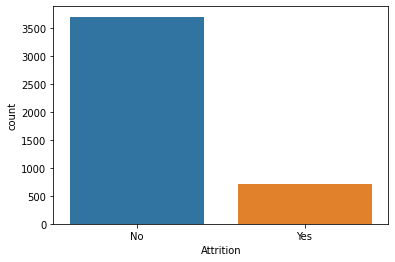

In [340]:
# Plot a countplot representing the distribution of the "attrition" variable
sns.countplot(x='Attrition', data=df);


I will be doing the same algorithms from the Logistical Regression model. 

5 methods:   
0) Control - no change in sampling from original model
1) Random over-sampling with imblearn   
2) Random under-sampling with imblearn     
3) Synthetic Minority Oversampling Technique (SMOTE)  
4) Under-sampling: Tomek links 

_____

## Method 0 - No adaption for imbalance

In [555]:
# # No columns dropped:
X0 = new_df.drop('Attrition_encoded', axis=1) 
y0 = new_df['Attrition_encoded']

# Split the dataset into train, val, and test sets
model0 = split_data(X0, y0)

Check distribution of sets (to check imbalance fix)

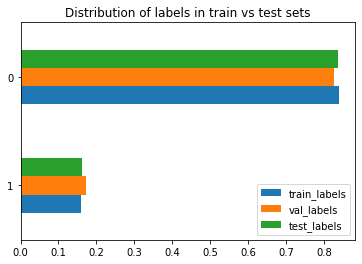

In [556]:
# Plot the distribution of train and test labels
train_labels0 = model0['train'][1].value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
val_labels0 = model0['val'][1].value_counts(normalize=True).sort_values(ascending=True).rename('val_labels')
test_labels0 = model0['test'][1].value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')

# Concatenate the number of examples in the train and test labels
label_counts0 = pd.concat([train_labels0, val_labels0, test_labels0], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts0.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

Exploring which is the max depth for both models to limit depth exploration

In [557]:
clf0_0 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf0_0 = clf0_0.fit(*model0['train'])
print(clf0_0.tree_.max_depth)

19


In [558]:
clf0_1 = tree.DecisionTreeClassifier(criterion = 'gini')
clf0_1 = clf0_1.fit(*model0['train'])
print(clf0_1.tree_.max_depth)

17


**Max amount was around 25; usually hovering around 20. I chose the depths to go above the max_depth to see it stabilize for the training set and see how it does on the validation set.**

In [559]:
# list of depths to explore (I chose integers up to 22)
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27] 

# ENTROPY
# train the models with the entropy criterion and varying depths
res_entropy = select_model(depths, model0, "entropy")

best_d_entropy = None
best_acc_entropy = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_entropy:
    val_acc = res_entropy[d]['val']
    if val_acc  > best_acc_entropy:
        best_d_entropy = d
        best_acc_entropy = val_acc

# GINI
# train the models with the gini impurity criterion and varying depths
res_gini = select_model(depths, model0,"gini")

best_d_gini = None
best_acc_gini = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_gini:
    val_acc = res_gini[d]['val']
    if val_acc  > best_acc_gini:
        best_d_gini = d
        best_acc_gini = val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

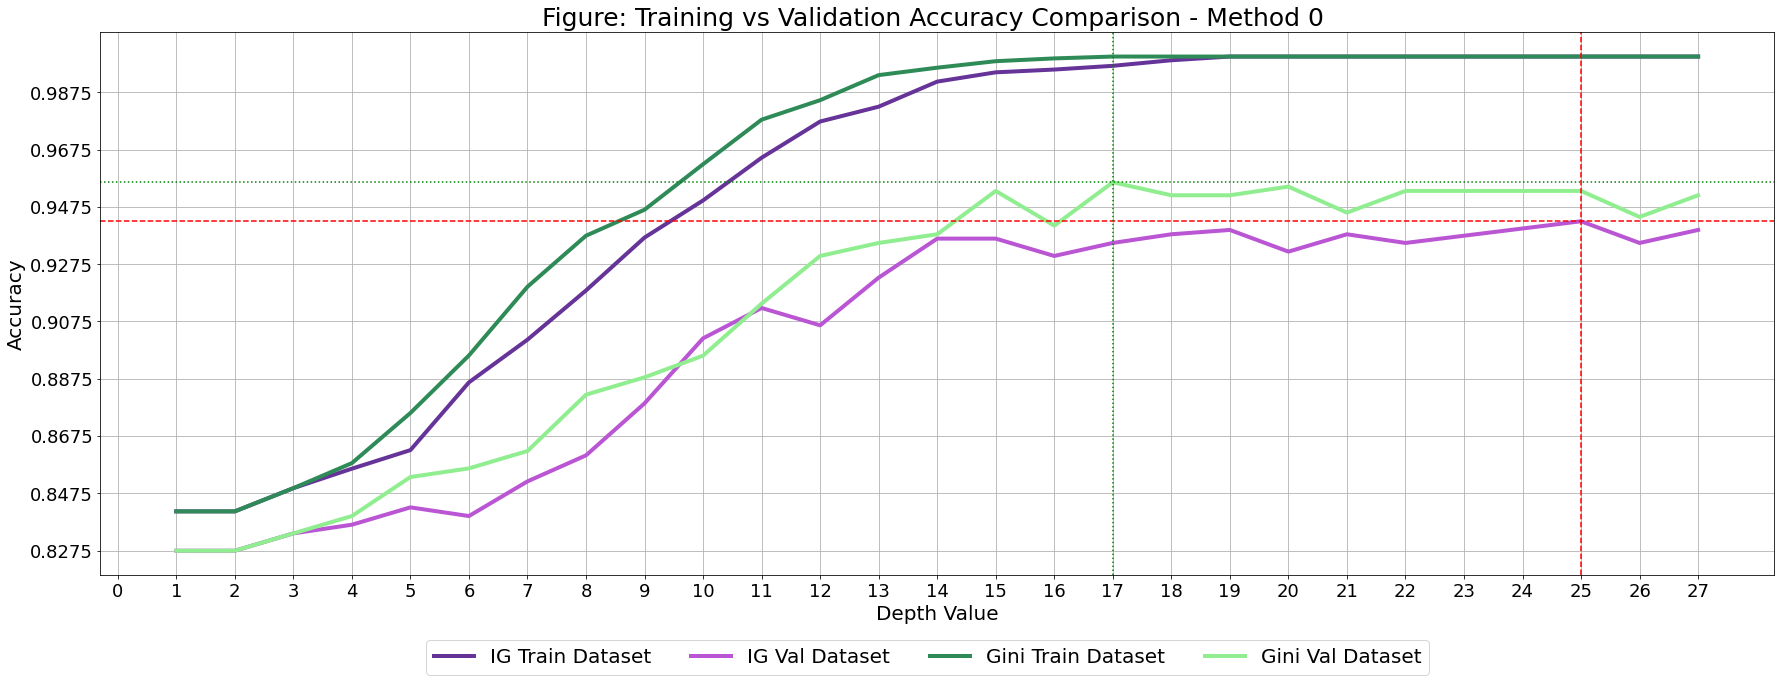

In [561]:
# Creating list of accuracy values for the calculations done above for entropy
entropy_val = []
entropy_train = []
depth_val = []
for d in res_entropy:
    entropy_val.append(res_entropy[d]['val'])
    entropy_train.append(res_entropy[d]['train'])
    depth_val.append(d)
    
# Creating list of accuracy values for the calculations done above for Gini
gini_val = []
gini_train = []
for d in res_gini:
    gini_val.append(res_gini[d]['val'])
    gini_train.append(res_gini[d]['train'])

# Calculating the absolute minimum and maximum of the accuracies
minimum_acc = min(min(gini_train), min(gini_val), min(entropy_train), min(entropy_val))
maximum_acc = max(max(gini_train), max(gini_val), max(entropy_train), max(entropy_val))

# Calculating the corresponding x-coordinate for both the Entropy and Gini maximum validation set accuracy:
entropy_max_x = depth_val[np.argmax(entropy_val)]
gini_max_x = depth_val[np.argmax(gini_val)]

# Line graph comparing Entropy and Gini criterion, with varying depths
plt.figure(figsize=(30, 10))
plt.plot(depth_val, entropy_train, label = "IG Train Dataset", color="rebeccapurple", linewidth=4)
plt.plot(depth_val, entropy_val, label = "IG Val Dataset", color="mediumorchid", linewidth=4)
plt.plot(depth_val, gini_train, label = "Gini Train Dataset", color="seagreen", linewidth=4)
plt.plot(depth_val, gini_val, label = "Gini Val Dataset", color="lightgreen", linewidth=4)

plt.title('Figure: Training vs Validation Accuracy Comparison - Method 0 ', fontsize=25)
plt.xlabel('Depth Value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(bbox_to_anchor=(0.8, -0.1), ncol=4, fontsize=20)
plt.xticks(np.arange(0, max(depth_val)+1, 1), fontsize=18)
plt.yticks(np.arange(minimum_acc, maximum_acc, 0.02), fontsize=18)

# Looking for x and y co-ordinate for the maximum accuracy for both models
plt.axhline(y = max(entropy_val), color='r', linestyle='dashed')
plt.axvline(x=entropy_max_x, color='r', linestyle='dashed')
plt.axhline(y = max(gini_val), color='g', linestyle='dotted')
plt.axvline(x=gini_max_x, color='g', linestyle='dotted')
plt.grid()

# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_acc_plot/DT_acc_plot_m0.png', bbox_inches='tight', facecolor = 'white')
plt.show

- Red is entropy max
- Green is gini max

**Based on several iterations of the above graph, Gini criterion did better majority of the time. For the depth, I found that the maximum validation set accuracy was wide ranging, from 15-25, however, usually the max or the near-max was around 18. Therefore, I have chosen the best depth to be 16 to not overfit the model.**

In [562]:
test_model0 = DecisionTreeClassifier(criterion = 'gini', max_depth = 18)
test_model0 = test_model0.fit(model0['train'][0], model0['train'][1])
y0_pred = test_model0.predict(model0['test'][0])

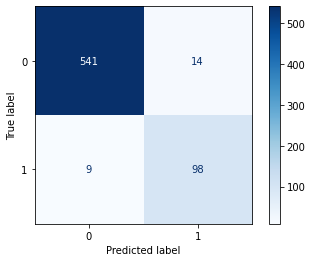

In [563]:
# Generate the Confusion Matrix for this model
cm0 = metrics.confusion_matrix(model0['test'][1], y0_pred)
disp0 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm0)
disp0.plot(cmap='Blues')
plt.show()

In [564]:
accuracy0 = pd.DataFrame(metrics.classification_report(model0['test'][1], y0_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy0


,precision,recall,f1-score,support
No Attrition,0.983636,0.974775,0.979186,555.000000
Yes Attrition,0.875000,0.915888,0.894977,107.000000
accuracy,0.965257,0.965257,0.965257,0.965257
macro avg,0.929318,0.945331,0.937081,662.000000
weighted avg,0.966077,0.965257,0.965575,662.000000


Top two layers of decision tree:

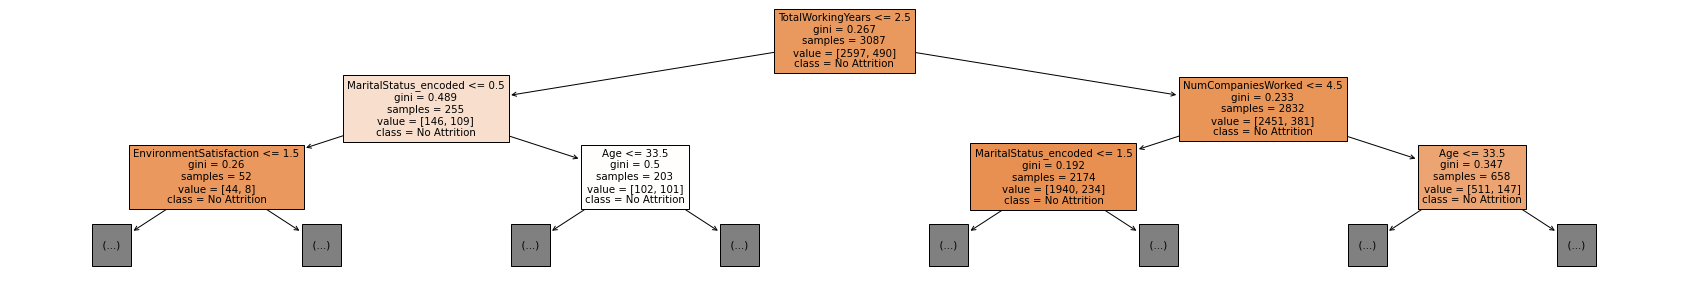

In [565]:
fig0 = plt.figure(figsize=(30,5))
_ = tree.plot_tree(test_model0,  filled=True, feature_names = X0.columns, max_depth = 2, class_names=['No Attrition', 'Yes Attrition'])


Diagram of whole tree:

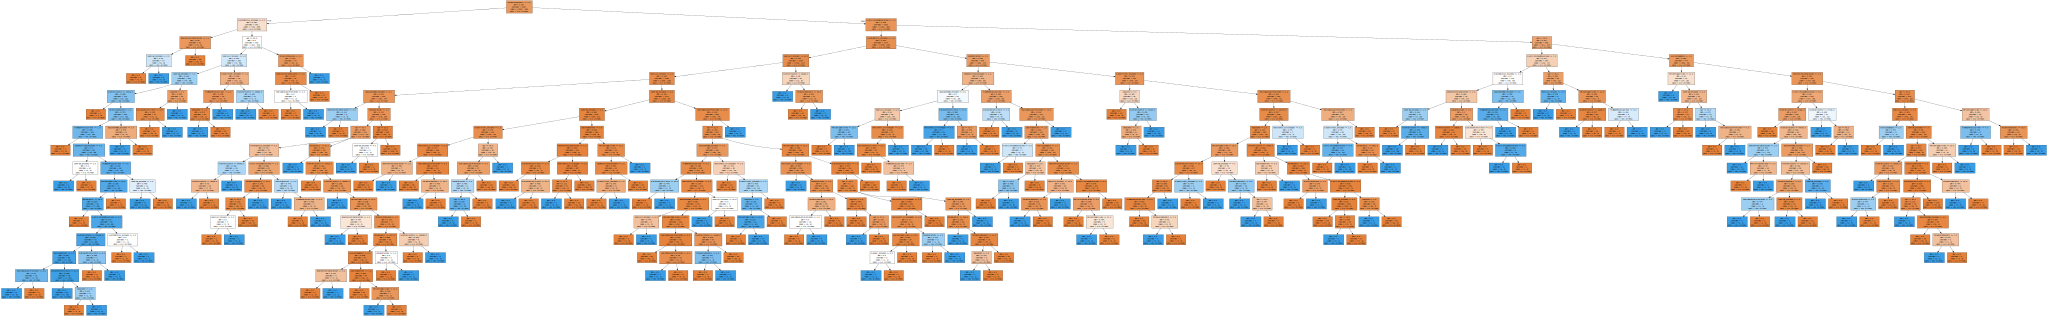

In [566]:
dot_data_tree0 = tree.export_graphviz(test_model0, out_file = None, filled=True, feature_names = X0.columns, class_names=['No Attrition', 'Yes Attrition'])

graph0 = graphviz.Source(dot_data_tree0, format="png") 
# graph0.render(filename='/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_graphs/dt_method0.dot')

graph0

____

## Method 1 - Oversampling (imblearn)

This model looks at fitting the decision tree model on the resampled set using oversampling function from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html).

In [598]:
# # No columns dropped:
X1 = new_df.drop('Attrition_encoded', axis=1) 

y1 = new_df['Attrition_encoded']

ros = RandomOverSampler()

# fit predictor and target 
variableX_ros, y_ros = ros.fit_resample(X1, y1)

print('Original dataset shape', y1.shape)
print('Resample dataset shape', y_ros.shape)

# Split the dataset into train, val, and test sets
model1 = split_data(variableX_ros, y_ros)

Original dataset shape (4410,)
Resample dataset shape (7398,)


Check distribution of sets (to check imbalance fix)

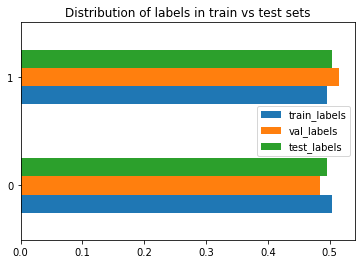

In [590]:
# Plot the distribution of train and test labels
train_labels1 = model1['train'][1].value_counts(normalize=True).rename('train_labels')
val_labels1 = model1['val'][1].value_counts(normalize=True).rename('val_labels')
test_labels1 = model1['test'][1].value_counts(normalize=True).rename('test_labels')


# Concatenate the number of examples in the train and test labels
label_counts1 = pd.concat([train_labels1, val_labels1, test_labels1], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts1.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

Exploring which is the max depth for both models to limit depth exploration

In [599]:
clf1_0 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf1_0 = clf1_0.fit(*model1['train'])
print(clf1_0.tree_.max_depth)

23


In [600]:
clf1_1 = tree.DecisionTreeClassifier(criterion = 'gini')
clf1_1 = clf1_1.fit(*model1['train'])
print(clf1_1.tree_.max_depth)

20


**Max amount was 24; usually hovering around 20. I chose the depths to go above the max_depth to see it stabilize for the training set and see how it does on the validation set.**

In [601]:
# list of depths to explore (I chose integers up to 26)
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26] 

# ENTROPY
# train the models with the entropy criterion and varying depths
res_entropy = select_model(depths, model1, "entropy")

best_d_entropy = None
best_acc_entropy = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_entropy:
    val_acc = res_entropy[d]['val']
    if val_acc  > best_acc_entropy:
        best_d_entropy = d
        best_acc_entropy = val_acc

# GINI
# train the models with the gini impurity criterion and varying depths
res_gini = select_model(depths, model1,"gini")

best_d_gini = None
best_acc_gini = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_gini:
    val_acc = res_gini[d]['val']
    if val_acc  > best_acc_gini:
        best_d_gini = d
        best_acc_gini = val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

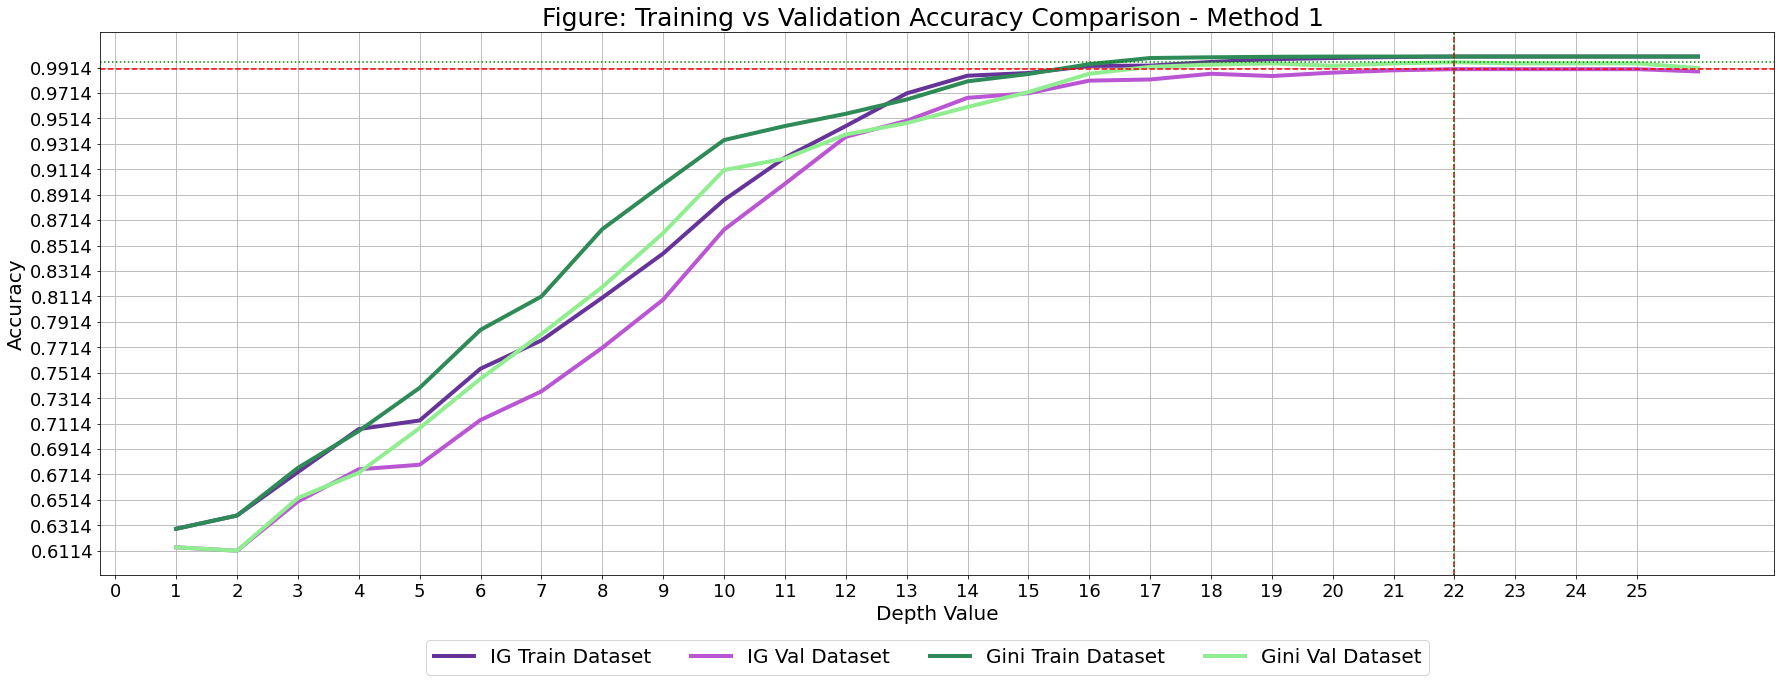

In [603]:
# Creating list of accuracy values for the calculations done above for entropy
entropy_val = []
entropy_train = []
depth_val = []
for d in res_entropy:
    entropy_val.append(res_entropy[d]['val'])
    entropy_train.append(res_entropy[d]['train'])
    depth_val.append(d)
    
# Creating list of accuracy values for the calculations done above for Gini
gini_val = []
gini_train = []
for d in res_gini:
    gini_val.append(res_gini[d]['val'])
    gini_train.append(res_gini[d]['train'])

# Calculating the absolute minimum and maximum of the accuracies
minimum_acc = min(min(gini_train), min(gini_val), min(entropy_train), min(entropy_val))
maximum_acc = max(max(gini_train), max(gini_val), max(entropy_train), max(entropy_val))

# Calculating the corresponding x-coordinate for both the Entropy and Gini maximum validation set accuracy:
entropy_max_x = depth_val[np.argmax(entropy_val)]
gini_max_x = depth_val[np.argmax(gini_val)]

# Line graph comparing Entropy and Gini criterion, with varying depths
plt.figure(figsize=(30, 10))
plt.plot(depth_val, entropy_train, label = "IG Train Dataset", color="rebeccapurple", linewidth=4)
plt.plot(depth_val, entropy_val, label = "IG Val Dataset", color="mediumorchid", linewidth=4)
plt.plot(depth_val, gini_train, label = "Gini Train Dataset", color="seagreen", linewidth=4)
plt.plot(depth_val, gini_val, label = "Gini Val Dataset", color="lightgreen", linewidth=4)

plt.title('Figure: Training vs Validation Accuracy Comparison - Method 1 ', fontsize=25)
plt.xlabel('Depth Value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(bbox_to_anchor=(0.8, -0.1), ncol=4, fontsize=20)
plt.xticks(np.arange(0, max(depth_val), 1), fontsize=18)
plt.yticks(np.arange(minimum_acc, maximum_acc, 0.02), fontsize=18)

# Looking for x and y co-ordinate for the maximum accuracy for both models
plt.axhline(y = max(entropy_val), color='r', linestyle='dashed')
plt.axvline(x=entropy_max_x, color='r', linestyle='dashed')
plt.axhline(y = max(gini_val), color='g', linestyle='dotted')
plt.axvline(x=gini_max_x, color='g', linestyle='dotted')
plt.grid()

# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_acc_plot/DT_acc_plot_m1.png', bbox_inches='tight', facecolor = 'white')
plt.show

- Red is entropy max
- Green is gini max

**Based on several iterations of the above graph, Gini and Entropy criterion did approximately equal. Gini increased faster at the start but plateaued sooner than Entropy. So I chose Entropy for the criterion. For the depth, I found that the maximum validation set accuracy was as high as the training set so analyzed the values that were lower than the maximize accuracy, to try to prevent overfitting. This value usually hovered around 13-16. Therefore, I have chosen the best depth to be 15 to not underfit or overfit the model.**

In [604]:
test_model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15)
test_model1 = test_model1.fit(model1['train'][0], model1['train'][1])
y1_pred = test_model1.predict(model1['test'][0])


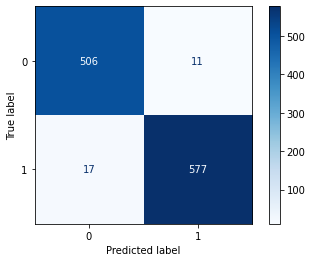

In [605]:
# Generate the Confusion Matrix for this model
cm1 = metrics.confusion_matrix(model1['test'][1], y1_pred)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap='Blues')
plt.show()

In [606]:
accuracy1 = pd.DataFrame(metrics.classification_report(model1['test'][1], y1_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy1


,precision,recall,f1-score,support
No Attrition,0.967495,0.978723,0.973077,517.000000
Yes Attrition,0.981293,0.971380,0.976311,594.000000
accuracy,0.974797,0.974797,0.974797,0.974797
macro avg,0.974394,0.975052,0.974694,1111.000000
weighted avg,0.974872,0.974797,0.974806,1111.000000


Top two layers of decision tree:

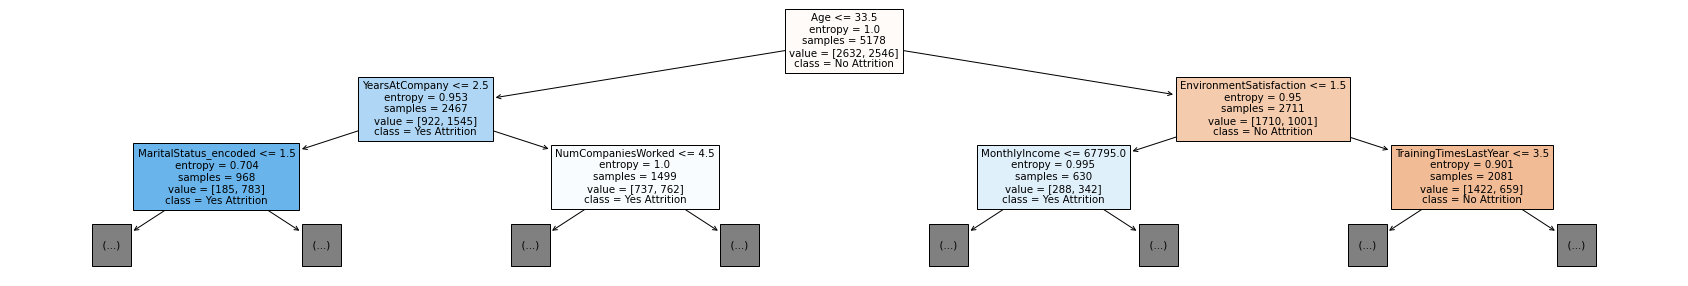

In [607]:
fig = plt.figure(figsize=(30,5))
_ = tree.plot_tree(test_model1,  filled=True, feature_names = X1.columns, max_depth = 2, class_names=['No Attrition', 'Yes Attrition'])


Diagram of whole tree:

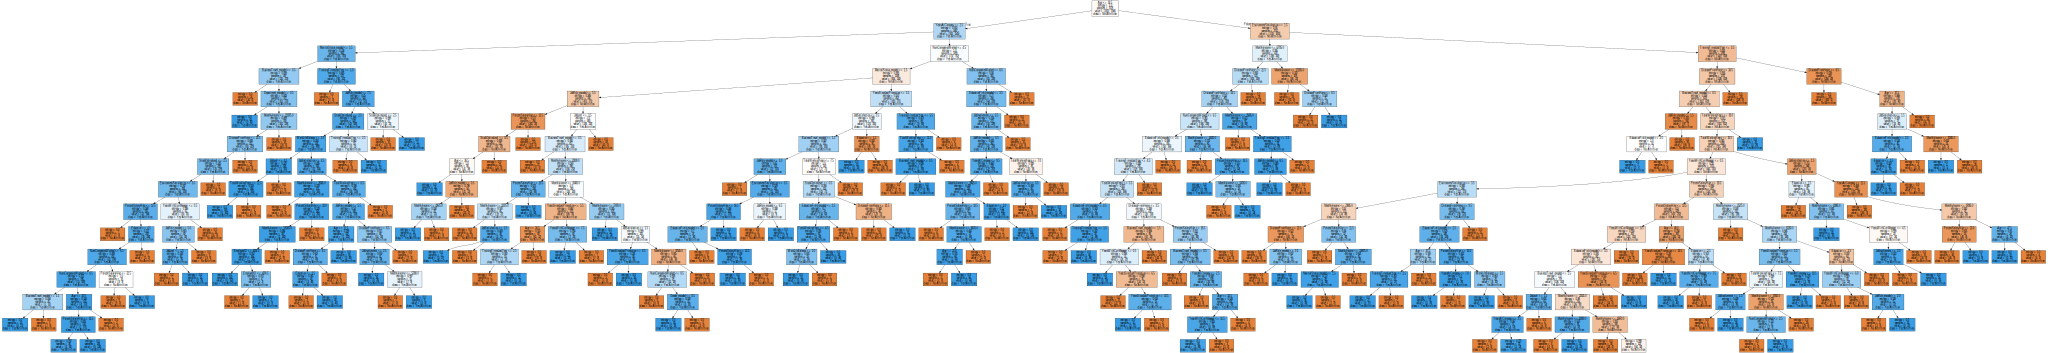

In [608]:
dot_data_tree1 = tree.export_graphviz(test_model1, out_file = None, filled=True, feature_names = X1.columns, class_names=['No Attrition', 'Yes Attrition'])

graph1 = graphviz.Source(dot_data_tree1, format="png") 
# graph1.render(filename='/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_graphs/dt_method1.dot')

graph1

_________

## Method 2 - Undersampling (imblearn)

This model looks at fitting the regression model on the resampled set using undersampling function from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).

In [657]:
X2 = new_df.drop(['Attrition_encoded'], axis=1)
y2 = new_df['Attrition_encoded']

rus = RandomUnderSampler()

# fit predictor and target 
variableX_rus, y_rus = rus.fit_resample(X2, y2)

print('Original dataset shape', y2.shape)
print('Resample dataset shape', y_rus.shape)

# Split the dataset into train, val, and test sets
model2 = split_data(variableX_rus, y_rus)

Original dataset shape (4410,)
Resample dataset shape (1422,)


Check distribution of sets (to check imbalance fix)

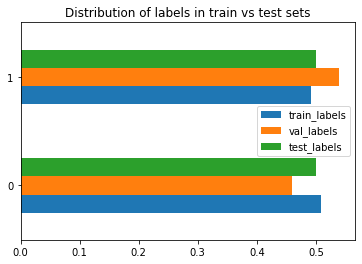

In [651]:
# Plot the distribution of train and test labels
train_labels2 = model2['train'][1].value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
val_labels2 = model2['val'][1].value_counts(normalize=True).sort_values(ascending=True).rename('val_labels')
test_labels2 = model2['test'][1].value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')


# Concatenate the number of examples in the train and test labels
label_counts2 = pd.concat([train_labels2, val_labels2, test_labels2], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts2.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

Exploring which is the max depth for both models to limit depth exploration

In [658]:
clf2_0 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf2_0 = clf2_0.fit(*model2['train'])
print(clf2_0.tree_.max_depth)

18


In [659]:
clf2_1 = tree.DecisionTreeClassifier(criterion = 'gini')
clf2_1 = clf2_1.fit(*model2['train'])
print(clf2_1.tree_.max_depth)

16


**Max amount was 25; usually hovering around 16. I chose the depths to go above the max_depth to see it stabilize for the training set and see how it does on the validation set.**

In [660]:
# list of depths to explore (I chose integers up to 26)
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26] 

# ENTROPY
# train the models with the entropy criterion and varying depths
res_entropy = select_model(depths, model2, "entropy")

best_d_entropy = None
best_acc_entropy = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_entropy:
    val_acc = res_entropy[d]['val']
    if val_acc  > best_acc_entropy:
        best_d_entropy = d
        best_acc_entropy = val_acc

# GINI
# train the models with the gini impurity criterion and varying depths
res_gini = select_model(depths, model2,"gini")

best_d_gini = None
best_acc_gini = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_gini:
    val_acc = res_gini[d]['val']
    if val_acc  > best_acc_gini:
        best_d_gini = d
        best_acc_gini = val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

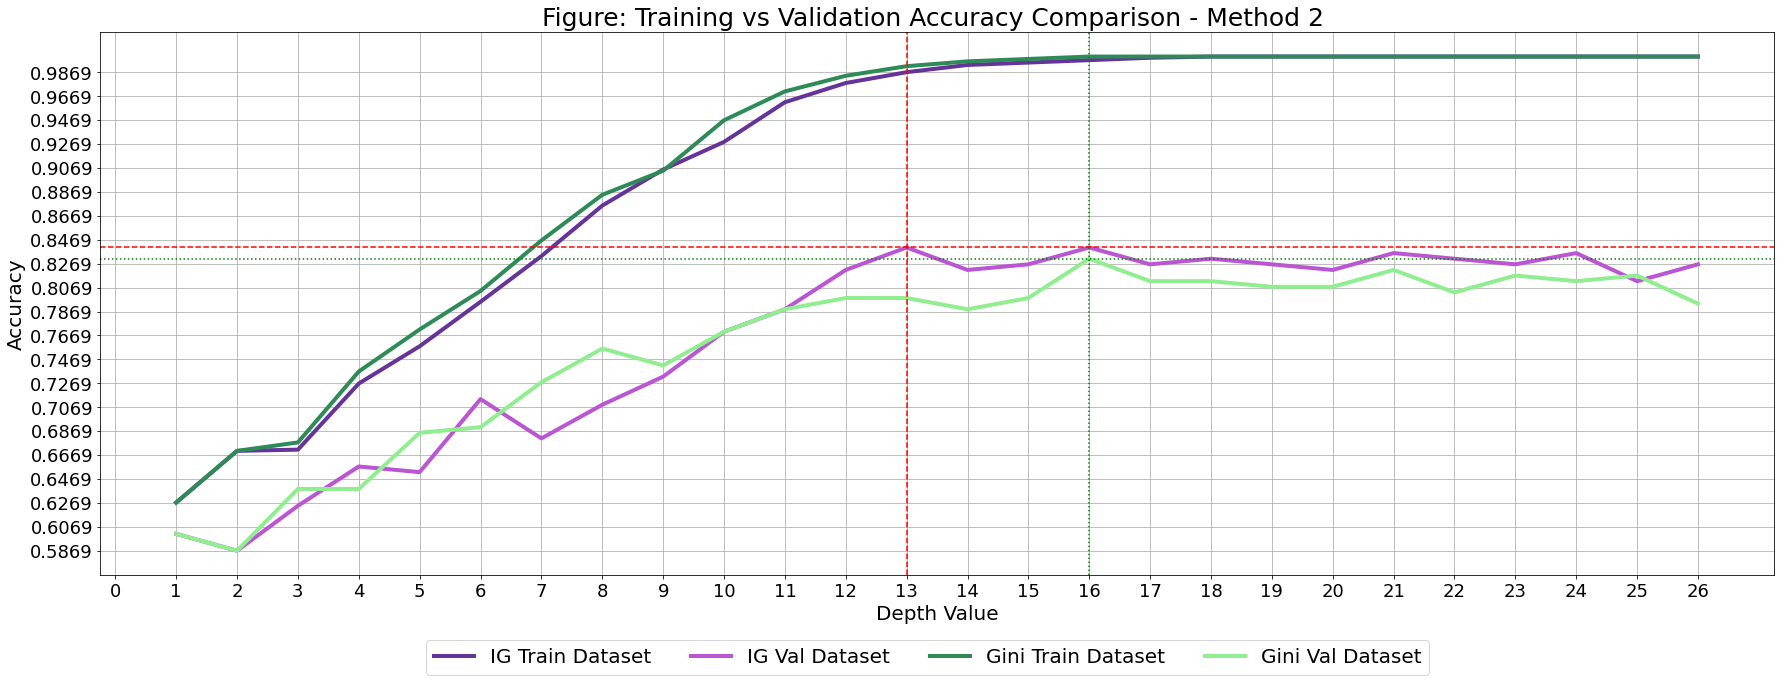

In [661]:
# Creating list of accuracy values for the calculations done above for entropy
entropy_val = []
entropy_train = []
depth_val = []
for d in res_entropy:
    entropy_val.append(res_entropy[d]['val'])
    entropy_train.append(res_entropy[d]['train'])
    depth_val.append(d)
    
# Creating list of accuracy values for the calculations done above for Gini
gini_val = []
gini_train = []
for d in res_gini:
    gini_val.append(res_gini[d]['val'])
    gini_train.append(res_gini[d]['train'])

# Calculating the absolute minimum and maximum of the accuracies
minimum_acc = min(min(gini_train), min(gini_val), min(entropy_train), min(entropy_val))
maximum_acc = max(max(gini_train), max(gini_val), max(entropy_train), max(entropy_val))

# Calculating the corresponding x-coordinate for both the Entropy and Gini maximum validation set accuracy:
entropy_max_x = depth_val[np.argmax(entropy_val)]
gini_max_x = depth_val[np.argmax(gini_val)]

# Line graph comparing Entropy and Gini criterion, with varying depths
plt.figure(figsize=(30, 10))
plt.plot(depth_val, entropy_train, label = "IG Train Dataset", color="rebeccapurple", linewidth=4)
plt.plot(depth_val, entropy_val, label = "IG Val Dataset", color="mediumorchid", linewidth=4)
plt.plot(depth_val, gini_train, label = "Gini Train Dataset", color="seagreen", linewidth=4)
plt.plot(depth_val, gini_val, label = "Gini Val Dataset", color="lightgreen", linewidth=4)

plt.title('Figure: Training vs Validation Accuracy Comparison - Method 2 ', fontsize=25)
plt.xlabel('Depth Value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(bbox_to_anchor=(0.8, -0.1), ncol=4, fontsize=20)
plt.xticks(np.arange(0, max(depth_val)+1, 1), fontsize=18)
plt.yticks(np.arange(minimum_acc, maximum_acc, 0.02), fontsize=18)

# Looking for x and y co-ordinate for the maximum accuracy for both models
plt.axhline(y = max(entropy_val), color='r', linestyle='dashed')
plt.axvline(x=entropy_max_x, color='r', linestyle='dashed')
plt.axhline(y = max(gini_val), color='g', linestyle='dotted')
plt.axvline(x=gini_max_x, color='g', linestyle='dotted')
plt.grid()

# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_acc_plot/DT_acc_plot_m2.png', bbox_inches='tight', facecolor = 'white')
plt.show

- Red is entropy max
- Green is gini max

**Based on several iterations of the above graph, Gini and Entropy criterion did approximately equal (on average). Entropy was usually higher, so I chose Entropy for the criterion. For the depth, I found that the maximum validation set accuracy was on average between 13-19, most of the time being 16. Therefore, I have chosen the best depth to be 16 to not underfit or overfit the model.**

In [668]:
test_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 16)
test_model2 = test_model2.fit(model2['train'][0], model2['train'][1])
y2_pred = test_model2.predict(model2['test'][0])

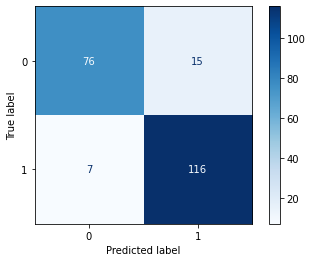

In [669]:
# Generate the Confusion Matrix for this model
cm2 = metrics.confusion_matrix(model2['test'][1], y2_pred)
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap='Blues')
plt.show()

In [671]:
accuracy2 = pd.DataFrame(metrics.classification_report(model2['test'][1], y2_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy2


,precision,recall,f1-score,support
No Attrition,0.915663,0.835165,0.873563,91.000000
Yes Attrition,0.885496,0.943089,0.913386,123.000000
accuracy,0.897196,0.897196,0.897196,0.897196
macro avg,0.900579,0.889127,0.893475,214.000000
weighted avg,0.898324,0.897196,0.896452,214.000000


Top two layers of the decision tree model:

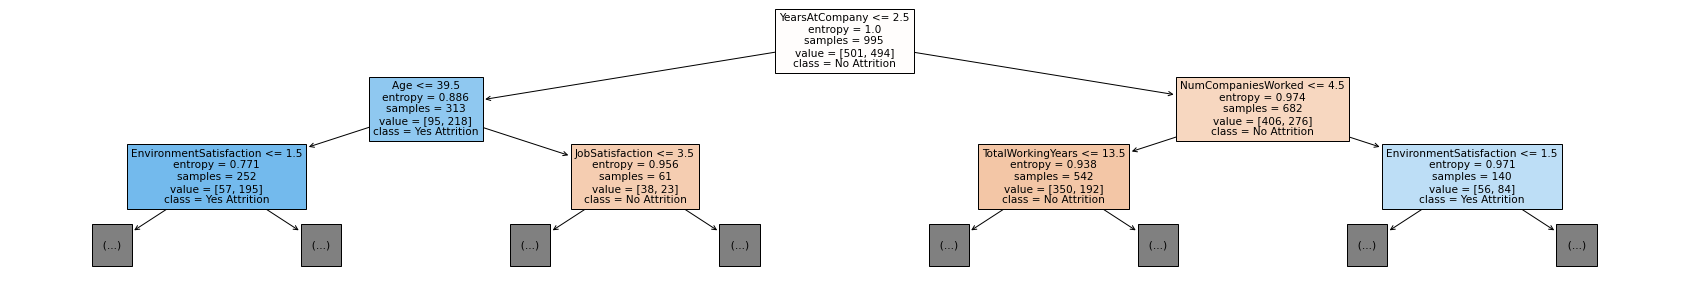

In [672]:
fig2 = plt.figure(figsize=(30,5))
_ = tree.plot_tree(test_model2,  filled=True, feature_names = X2.columns, max_depth = 2, class_names=['No Attrition', 'Yes Attrition'])


Whole decision tree:

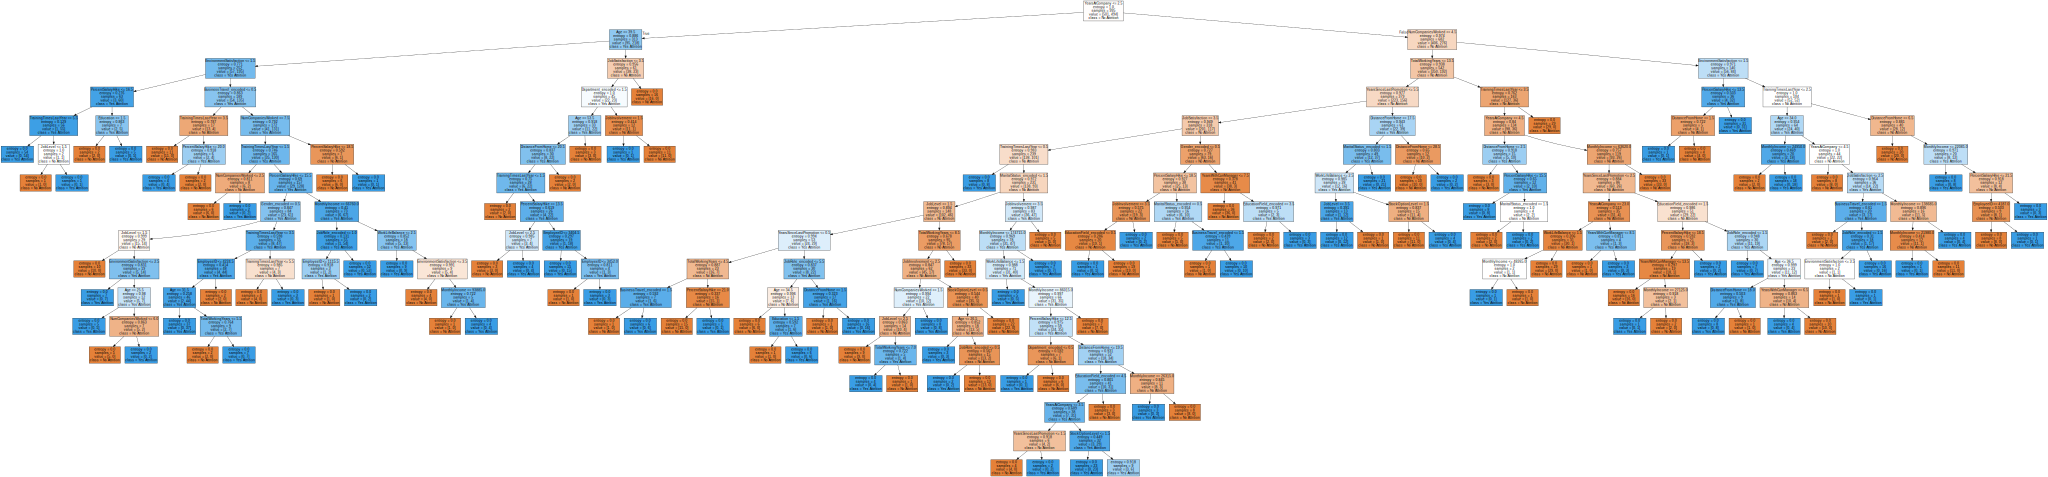

In [673]:
dot_data_tree2 = tree.export_graphviz(test_model2, out_file = None, filled=True, feature_names = X2.columns, class_names=['No Attrition', 'Yes Attrition'])

graph2 = graphviz.Source(dot_data_tree2, format="png") 
# graph2.render(filename='/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_graphs/dt_method2.dot')

graph2

___

## Method 3 - SMOTE

This model looks at fitting the regression model on the resampled set using SMOTE from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

SMOTE (Synthetic Minority Oversampling Technique): works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors to increase the number of minority points in the dataset.

In [714]:
X3 = new_df.drop(['Attrition_encoded'], axis=1)
y3 = new_df['Attrition_encoded']

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X3, y3)

print('Original dataset shape', y3.shape)
print('Resample dataset shape', y_smote.shape)

# Split the dataset into train, val, and test sets
model3 = split_data(x_smote, y_smote)

Original dataset shape (4410,)
Resample dataset shape (7398,)


Check distribution of sets (to check imbalance fix)

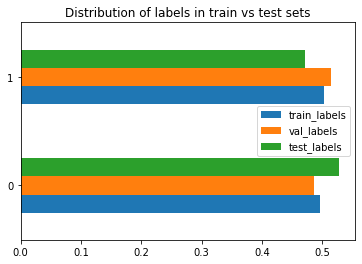

In [715]:
# Plot the distribution of train and test labels
train_labels3 = model3['train'][1].value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
val_labels3 = model3['val'][1].value_counts(normalize=True).sort_values(ascending=True).rename('val_labels')
test_labels3 = model3['test'][1].value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')


# Concatenate the number of examples in the train and test labels
label_counts3 = pd.concat([train_labels3, val_labels3, test_labels3], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts3.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

Exploring which is the max depth for both models to limit depth exploration

In [716]:
clf3_0 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf3_0 = clf3_0.fit(*model3['train'])
print(clf3_0.tree_.max_depth)

18


In [717]:
clf3_1 = tree.DecisionTreeClassifier(criterion = 'gini')
clf3_1 = clf3_1.fit(*model3['train'])
print(clf3_1.tree_.max_depth)

19


**Max amount was 20; usually hovering around 18. I chose the depths to go above the max_depth to see it stabilize for the training set and see how it does on the validation set.**

In [718]:
# list of depths to explore (I chose integers up to 23)
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] 

# ENTROPY
# train the models with the entropy criterion and varying depths
res_entropy = select_model(depths, model3, "entropy")

best_d_entropy = None
best_acc_entropy = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_entropy:
    val_acc = res_entropy[d]['val']
    if val_acc  > best_acc_entropy:
        best_d_entropy = d
        best_acc_entropy = val_acc

# GINI
# train the models with the gini impurity criterion and varying depths
res_gini = select_model(depths, model3,"gini")

best_d_gini = None
best_acc_gini = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_gini:
    val_acc = res_gini[d]['val']
    if val_acc  > best_acc_gini:
        best_d_gini = d
        best_acc_gini = val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

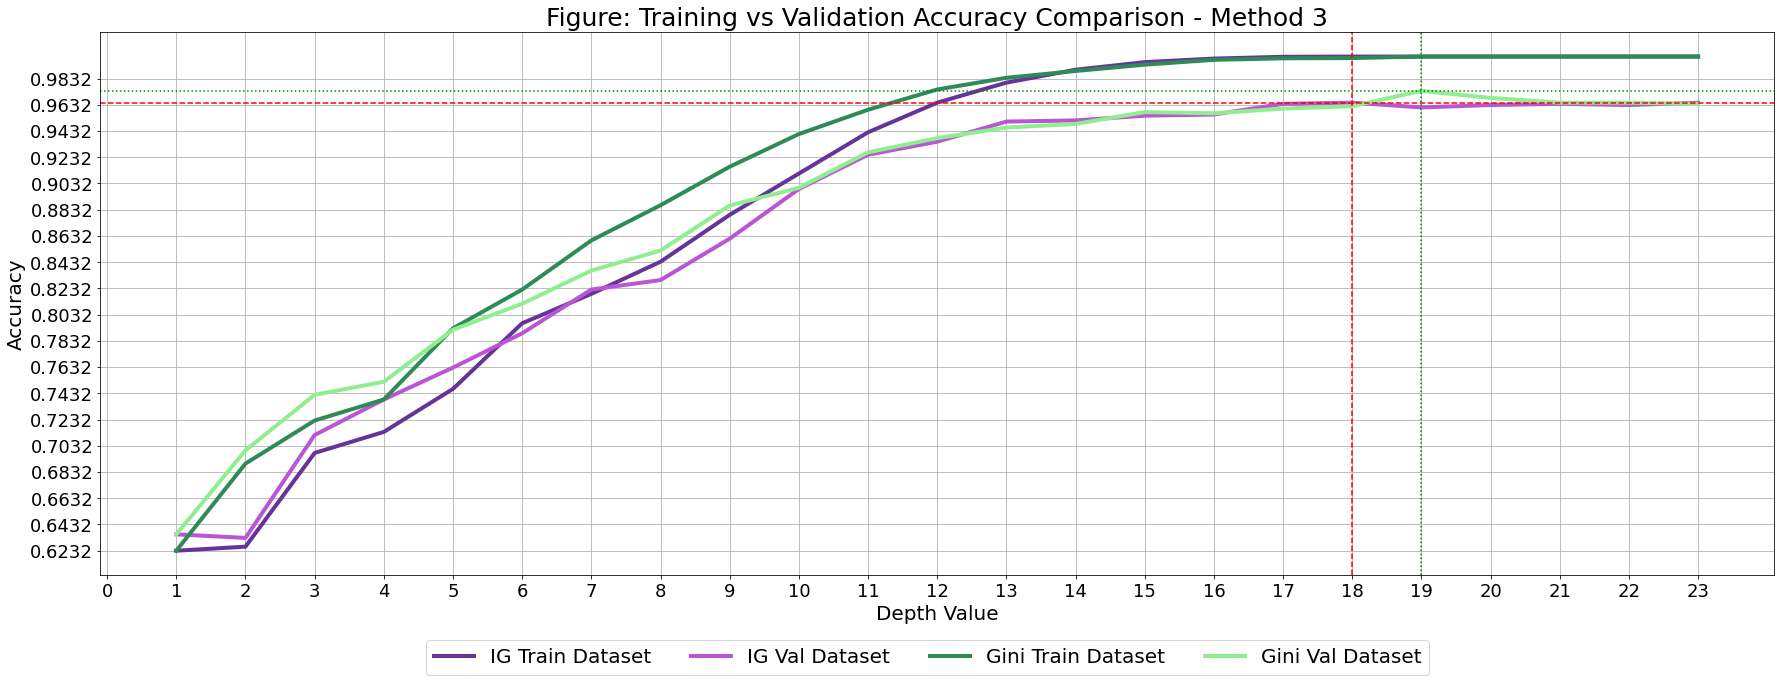

In [727]:
# Creating list of accuracy values for the calculations done above for entropy
entropy_val = []
entropy_train = []
depth_val = []
for d in res_entropy:
    entropy_val.append(res_entropy[d]['val'])
    entropy_train.append(res_entropy[d]['train'])
    depth_val.append(d)
    
# Creating list of accuracy values for the calculations done above for Gini
gini_val = []
gini_train = []
for d in res_gini:
    gini_val.append(res_gini[d]['val'])
    gini_train.append(res_gini[d]['train'])

# Calculating the absolute minimum and maximum of the accuracies
minimum_acc = min(min(gini_train), min(gini_val), min(entropy_train), min(entropy_val))
maximum_acc = max(max(gini_train), max(gini_val), max(entropy_train), max(entropy_val))

# Calculating the corresponding x-coordinate for both the Entropy and Gini maximum validation set accuracy:
entropy_max_x = depth_val[np.argmax(entropy_val)]
gini_max_x = depth_val[np.argmax(gini_val)]

# Line graph comparing Entropy and Gini criterion, with varying depths
plt.figure(figsize=(30, 10))
plt.plot(depth_val, entropy_train, label = "IG Train Dataset", color="rebeccapurple", linewidth=4)
plt.plot(depth_val, entropy_val, label = "IG Val Dataset", color="mediumorchid", linewidth=4)
plt.plot(depth_val, gini_train, label = "Gini Train Dataset", color="seagreen", linewidth=4)
plt.plot(depth_val, gini_val, label = "Gini Val Dataset", color="lightgreen", linewidth=4)

plt.title('Figure: Training vs Validation Accuracy Comparison - Method 3', fontsize=25)
plt.xlabel('Depth Value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(bbox_to_anchor=(0.8, -0.1), ncol=4, fontsize=20)
plt.xticks(np.arange(0, max(depth_val)+1, 1), fontsize=18)
plt.yticks(np.arange(minimum_acc, maximum_acc, 0.02), fontsize=18)

# Looking for x and y co-ordinate for the maximum accuracy for both models
plt.axhline(y = max(entropy_val), color='r', linestyle='dashed')
plt.axvline(x=entropy_max_x, color='r', linestyle='dashed')
plt.axhline(y = max(gini_val), color='g', linestyle='dotted')
plt.axvline(x=gini_max_x, color='g', linestyle='dotted')
plt.grid()

# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_acc_plot/DT_acc_plot_m3.png', bbox_inches='tight', facecolor = 'white')
plt.show

- Red is entropy max
- Green is gini max

**Based on several iterations of the above graph, Gini and Entropy criterion did approximately equal. Gini increased slightly faster, on average, so I chose Gini as to try to avoid overfitting with a lower max_depth. For the depth, I found that the maximum validation set accuracy were close to as high as the training set so analyzed the values that were lower than the maximize accuracy, to try to prevent overfitting. This value usually hovered around 15-19. Therefore, I have chosen the best depth to be 17 to not underfit or overfit the model.**

In [724]:
test_model3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 17)
test_model3 = test_model3.fit(model3['train'][0], model3['train'][1])
y3_pred = test_model3.predict(model3['test'][0])

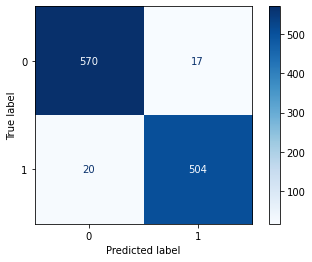

In [725]:
# Generate the Confusion Matrix for this model
cm3 = metrics.confusion_matrix(model3['test'][1], y3_pred)
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot(cmap='Blues')
plt.show()

In [726]:
accuracy3 = pd.DataFrame(metrics.classification_report(model3['test'][1], y3_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy3


,precision,recall,f1-score,support
No Attrition,0.966102,0.971039,0.968564,587.000000
Yes Attrition,0.967370,0.961832,0.964593,524.000000
accuracy,0.966697,0.966697,0.966697,0.966697
macro avg,0.966736,0.966436,0.966579,1111.000000
weighted avg,0.966700,0.966697,0.966691,1111.000000


Top two layers of the decision tree:

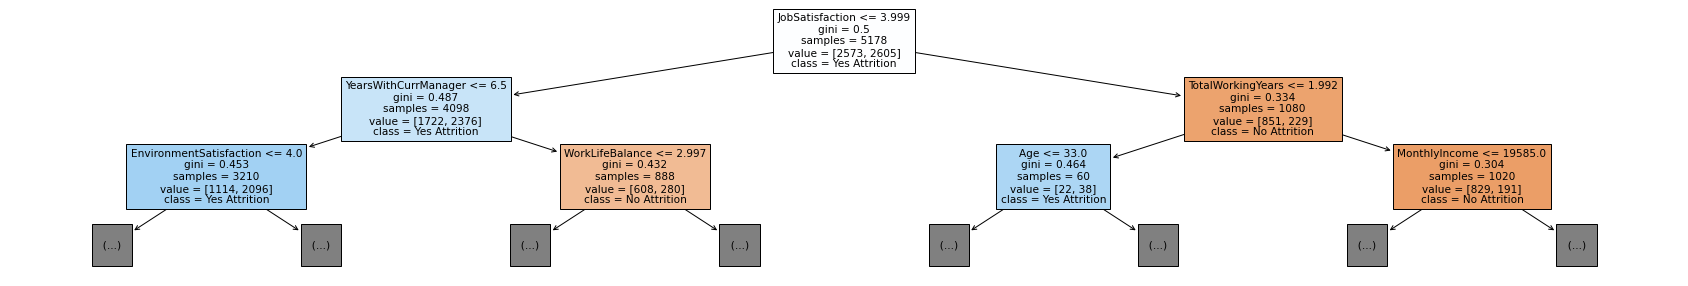

In [729]:
fig3 = plt.figure(figsize=(30,5))
_ = tree.plot_tree(test_model3,  filled=True, feature_names = X3.columns, max_depth = 2, class_names=['No Attrition', 'Yes Attrition'])


Diagram of whole decision tree:

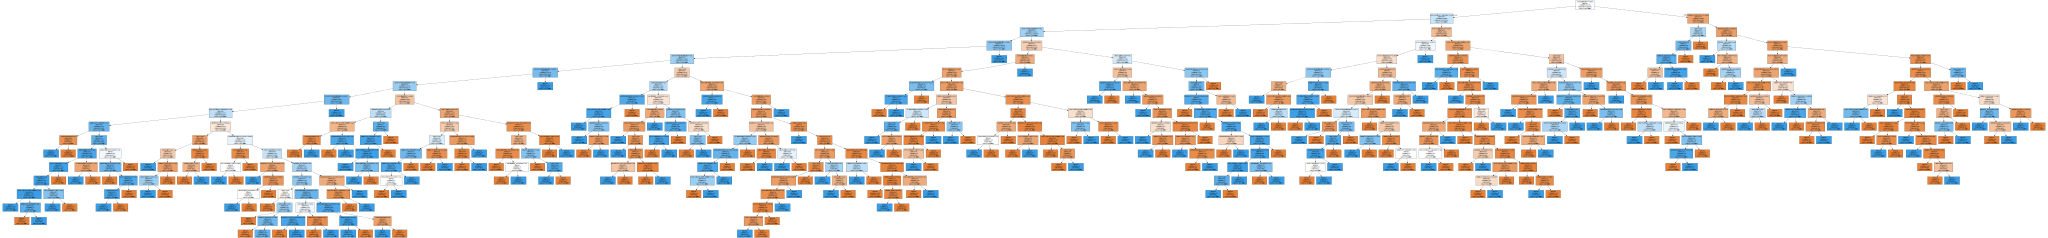

In [730]:
dot_data_tree3 = tree.export_graphviz(test_model3, out_file = None, filled=True, feature_names = X3.columns, class_names=['No Attrition', 'Yes Attrition'])

graph3 = graphviz.Source(dot_data_tree3, format="png") 
graph3.render(filename='/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_graphs/dt_method3.dot')

graph3

_____

## Model 4 - Tomek Links

This model looks at fitting the regression model on the resampled set using Tomek Links from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

Tomek Links: pairs minority with majority nearest neighbours and then deletes the majority nearest neighbour. This gives more distance between the two groups, making it easier to classify the minority.

In [814]:
X4 = new_df.drop(['Attrition_encoded'], axis=1)
y4 = new_df['Attrition_encoded']

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X4, y4)

print('Original dataset shape', y4.shape)
print('Resample dataset shape', y_tl.shape)

# Split the dataset into train, val, and test sets
model4 = split_data(variableX_rus, y_rus)

Original dataset shape (4410,)
Resample dataset shape (4037,)


Check distribution of sets (to check imbalance fix)

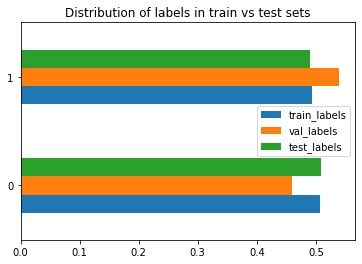

In [732]:
# Plot the distribution of train and test labels
train_labels4 = model4['train'][1].value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
val_labels4 = model4['val'][1].value_counts(normalize=True).sort_values(ascending=True).rename('val_labels')
test_labels4 = model4['test'][1].value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')


# Concatenate the number of examples in the train and test labels
label_counts4 = pd.concat([train_labels4, val_labels4, test_labels4], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts4.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

Exploring which is the max depth for both models to limit depth exploration

In [777]:
clf4_0 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf4_0 = clf4_0.fit(*model4['train'])
print(clf4_0.tree_.max_depth)

14


In [780]:
clf4_1 = tree.DecisionTreeClassifier(criterion = 'gini')
clf4_1 = clf4_1.fit(*model4['train'])
print(clf4_1.tree_.max_depth)

14


**Max amount was 21; usually hovering around 17. I chose the depths to go above the max_depth to see it stabilize for the training set and see how it does on the validation set.**

In [815]:
# list of depths to explore (I chose integers up to 23)
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] 

# ENTROPY
# train the models with the entropy criterion and varying depths
res_entropy = select_model(depths, model4, "entropy")

best_d_entropy = None
best_acc_entropy = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_entropy:
    val_acc = res_entropy[d]['val']
    if val_acc  > best_acc_entropy:
        best_d_entropy = d
        best_acc_entropy = val_acc

# GINI
# train the models with the gini impurity criterion and varying depths
res_gini = select_model(depths, model4,"gini")

best_d_gini = None
best_acc_gini = 0

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_gini:
    val_acc = res_gini[d]['val']
    if val_acc  > best_acc_gini:
        best_d_gini = d
        best_acc_gini = val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

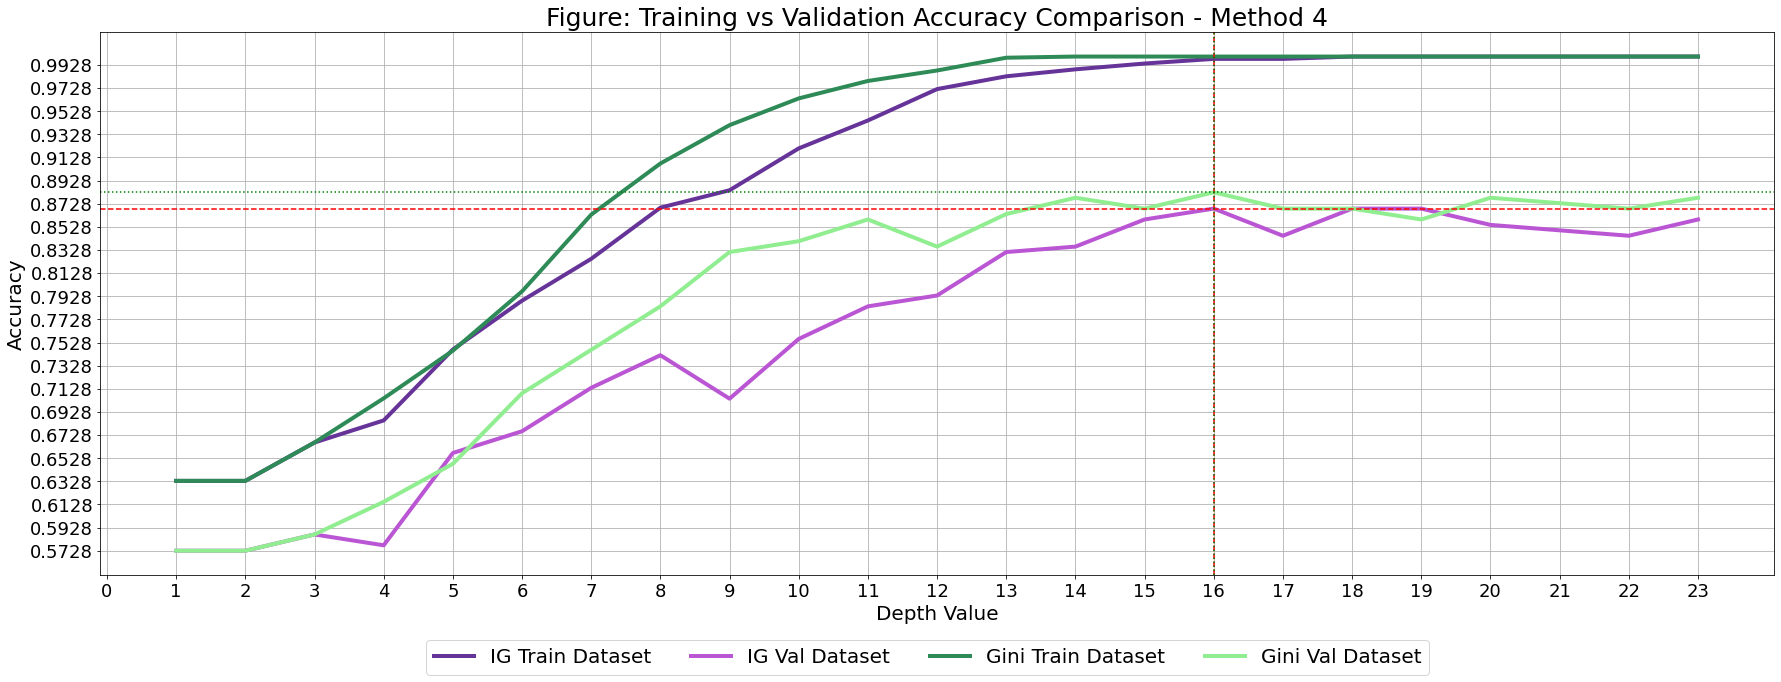

In [818]:
# Creating list of accuracy values for the calculations done above for entropy
entropy_val = []
entropy_train = []
depth_val = []
for d in res_entropy:
    entropy_val.append(res_entropy[d]['val'])
    entropy_train.append(res_entropy[d]['train'])
    depth_val.append(d)
    
# Creating list of accuracy values for the calculations done above for Gini
gini_val = []
gini_train = []
for d in res_gini:
    gini_val.append(res_gini[d]['val'])
    gini_train.append(res_gini[d]['train'])

# Calculating the absolute minimum and maximum of the accuracies
minimum_acc = min(min(gini_train), min(gini_val), min(entropy_train), min(entropy_val))
maximum_acc = max(max(gini_train), max(gini_val), max(entropy_train), max(entropy_val))

# Calculating the corresponding x-coordinate for both the Entropy and Gini maximum validation set accuracy:
entropy_max_x = depth_val[np.argmax(entropy_val)]
gini_max_x = depth_val[np.argmax(gini_val)]

# Line graph comparing Entropy and Gini criterion, with varying depths
plt.figure(figsize=(30, 10))
plt.plot(depth_val, entropy_train, label = "IG Train Dataset", color="rebeccapurple", linewidth=4)
plt.plot(depth_val, entropy_val, label = "IG Val Dataset", color="mediumorchid", linewidth=4)
plt.plot(depth_val, gini_train, label = "Gini Train Dataset", color="seagreen", linewidth=4)
plt.plot(depth_val, gini_val, label = "Gini Val Dataset", color="lightgreen", linewidth=4)

plt.title('Figure: Training vs Validation Accuracy Comparison - Method 4', fontsize=25)
plt.xlabel('Depth Value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(bbox_to_anchor=(0.8, -0.1), ncol=4, fontsize=20)
plt.xticks(np.arange(0, max(depth_val)+1, 1), fontsize=18)
plt.yticks(np.arange(minimum_acc, maximum_acc, 0.02), fontsize=18)

# Looking for x and y co-ordinate for the maximum accuracy for both models
plt.axhline(y = max(entropy_val), color='r', linestyle='dashed')
plt.axvline(x=entropy_max_x, color='r', linestyle='dashed')
plt.axhline(y = max(gini_val), color='g', linestyle='dotted')
plt.axvline(x=gini_max_x, color='g', linestyle='dotted')
plt.grid()

# plt.savefig('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_acc_plot/DT_acc_plot_m4.png', bbox_inches='tight', facecolor = 'white')
plt.show

- Red is entropy max
- Green is gini max

**Based on several iterations of the above graph, Gini and Entropy both did varying levels of well. However, more often when Gini did better, it did far better at a lower depth. To  have less of a depth, to potentially decrease overfitting, I chose Gini for the criterion. For the depth, I found that the maximum validation set accuracy was occasionally fairly high (19-22) but a lower depth value would be very close to a similar accuracy (maybe just slightly lower) as the training set. I analyzed the second largest (and occasionally largest) val accuracy and found an average depth of 15.**

In [834]:
test_model4 = DecisionTreeClassifier(criterion = 'gini', max_depth = 15)
test_model4 = test_model4.fit(model4['train'][0], model4['train'][1])
y4_pred = test_model4.predict(model4['test'][0])

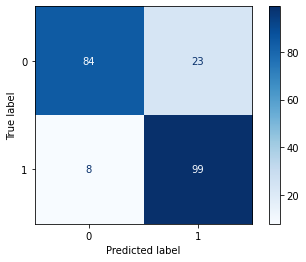

In [835]:
# Generate the Confusion Matrix for this model
cm4 = metrics.confusion_matrix(model4['test'][1], y4_pred)
disp4 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot(cmap='Blues')
plt.show()

In [849]:
accuracy4 = pd.DataFrame(metrics.classification_report(model4['test'][1], y4_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy4


,precision,recall,f1-score,support
No Attrition,0.913043,0.785047,0.844221,107.00000
Yes Attrition,0.811475,0.925234,0.864629,107.00000
accuracy,0.855140,0.855140,0.855140,0.85514
macro avg,0.862259,0.855140,0.854425,214.00000
weighted avg,0.862259,0.855140,0.854425,214.00000


Top two layers of the decision tree:

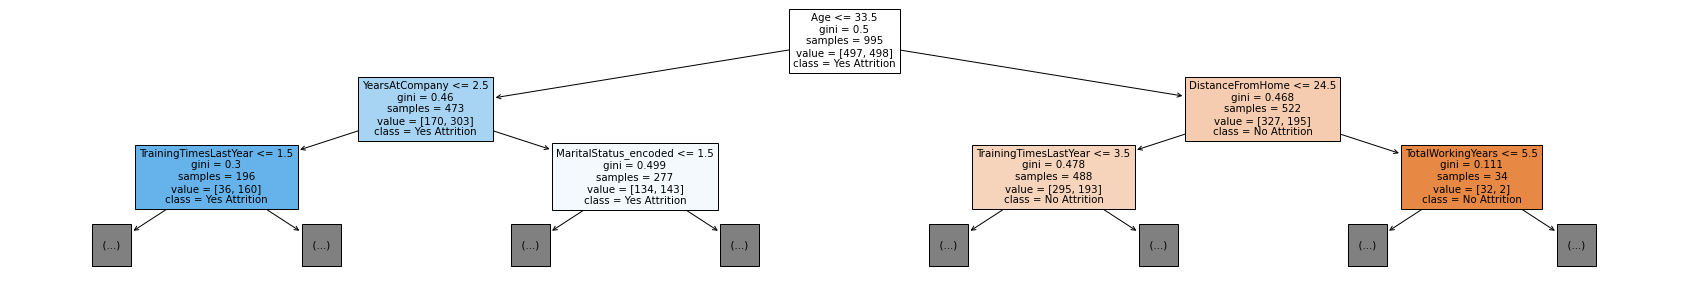

In [837]:
fig4 = plt.figure(figsize=(30,5))
_ = tree.plot_tree(test_model4,  filled=True, feature_names = X4.columns, max_depth = 2, class_names=['No Attrition', 'Yes Attrition'])


Diagram of whole decision tree:

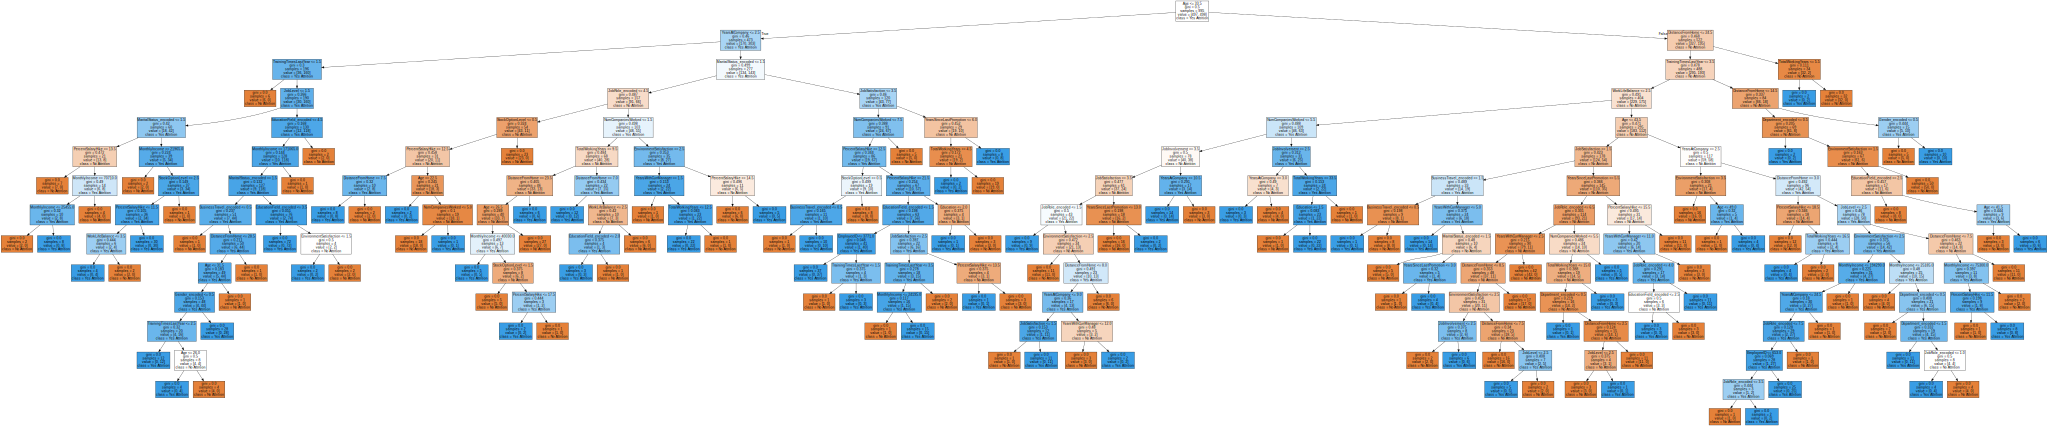

In [838]:
dot_data_tree4 = tree.export_graphviz(test_model4, out_file = None, filled=True, feature_names = X4.columns, class_names=['No Attrition', 'Yes Attrition'])

graph4 = graphviz.Source(dot_data_tree4, format="png") 
# graph4.render(filename='/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/DT_graphs/dt_method4.dot')

graph4

___

## Conclusion:

In [841]:
combined_conclusion_df = pd.DataFrame({
    'Method0' : [accuracy0['precision']['No Attrition'], accuracy0['precision']['Yes Attrition'], accuracy0['recall']['No Attrition'], accuracy0['recall']['Yes Attrition'], accuracy0['f1-score']['No Attrition'], accuracy0['f1-score']['Yes Attrition'], accuracy0['f1-score']['accuracy']],
    'Method1' : [accuracy1['precision']['No Attrition'], accuracy1['precision']['Yes Attrition'], accuracy1['recall']['No Attrition'], accuracy1['recall']['Yes Attrition'], accuracy1['f1-score']['No Attrition'], accuracy1['f1-score']['Yes Attrition'], accuracy1['f1-score']['accuracy']],
    'Method2' : [accuracy2['precision']['No Attrition'], accuracy2['precision']['Yes Attrition'], accuracy2['recall']['No Attrition'], accuracy2['recall']['Yes Attrition'], accuracy2['f1-score']['No Attrition'], accuracy2['f1-score']['Yes Attrition'], accuracy2['f1-score']['accuracy']],
    'Method3' : [accuracy3['precision']['No Attrition'], accuracy3['precision']['Yes Attrition'], accuracy3['recall']['No Attrition'], accuracy3['recall']['Yes Attrition'], accuracy3['f1-score']['No Attrition'], accuracy3['f1-score']['Yes Attrition'], accuracy3['f1-score']['accuracy']],
    'Method4' : [accuracy4['precision']['No Attrition'], accuracy4['precision']['Yes Attrition'], accuracy4['recall']['No Attrition'], accuracy4['recall']['Yes Attrition'], accuracy4['f1-score']['No Attrition'], accuracy4['f1-score']['Yes Attrition'], accuracy4['f1-score']['accuracy']],
    
})

combined_conclusion_df = combined_conclusion_df.set_axis(['no_precision', 'yes_precision',
                                 'no_recall', 'yes_recall',
                                 'no_f1', 'yes_f1',
                                 'accuracy'
                                ], axis=0)

# Save to png
# dfi.export(combined_conclusion_df, '/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/decision_tree_comparison.png')

combined_conclusion_df


objc[49102]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa62646318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x119337f48). One of the two will be used. Which one is undefined.
[0419/121756.683764:INFO:headless_shell.cc(659)] Written to file /var/folders/2f/v588s3cn6bqfcb4gvqd8hc7r0000gn/T/tmprr_kl5k2/temp.png.


,Method0,Method1,Method2,Method3,Method4
no_precision,0.983636,0.967495,0.915663,0.966102,0.913043
yes_precision,0.875000,0.981293,0.885496,0.967370,0.811475
no_recall,0.974775,0.978723,0.835165,0.971039,0.785047
yes_recall,0.915888,0.971380,0.943089,0.961832,0.925234
no_f1,0.979186,0.973077,0.873563,0.968564,0.844221
yes_f1,0.894977,0.976311,0.913386,0.964593,0.864629
accuracy,0.965257,0.974797,0.897196,0.966697,0.855140


---

## Which method did best?

The regular method (with no adjustment for the imbalanced data) did very well, especially when compared with the regression model. However, the oversampling increased the prediction for both yes and no attrition, making it the best model and method.

### Method 1 (Oversampling with imblearn)

Method 1 model was trained on criterion Entropy with a max_depth of 15. The entropy stayed relatively high for majority of the tree, meaning that although it did perform well, it had a lot of disorder for each classification.